# <p style="background:navy;color:white;border :black solid;font-family:Comic Sans MS; font-size:150%;text-align:center;  border-radius: 20px 40px;">Student Performance Predictive Analysis</p>

<center>
<img src="https://images.unsplash.com/photo-1434030216411-0b793f4b4173?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8c3R1ZGVudCUyMGxlYXJuaW5nfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=600&q=60" width=600>
</center>

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">Importing Libraries & Loading the Data</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [2]:
stud_perf=pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
stud_perf.describe()

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">Feature Engineering</p>

### <span style="font-family:Comic Sans MS; color:black">Lets crete new column representing total marks which is nothing but sum of math, reading and writing scores</span>

In [5]:
stud_perf['Total marks']=stud_perf['math score']+stud_perf['reading score']+stud_perf['writing score']

In [6]:
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### <span style="font-family:Comic Sans MS; color:blue">Converting Categorical Features Into Numerical</span> 

### <span style="font-family:Comic Sans MS; color:black">To predict the total marks of any student in the table we need to take into consideration all the columns.<br/>So lets convert the categorical data columns into numerical ones by using get_dummies function</span>

In [7]:
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
stud_perf=pd.get_dummies(stud_perf, drop_first=True)
stud_perf.head()

,math score,reading score,writing score,Total marks,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


### <span style="font-family:Comic Sans MS; color:black">Creating final dataframe so as to train the model</span>

In [9]:
stud_perf.head()

,math score,reading score,writing score,Total marks,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">Predictive Analysis</p>

## <span style="font-family:Comic Sans MS; color:blue">Importing the Libraries</span> 

In [10]:
from sklearn.model_selection import train_test_split #for spliting the data
from sklearn import metrics #for evaluation of the model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.linear_model import LassoLarsCV

### <span style="font-family:Comic Sans MS; color:black">Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).</span>

 ## <span style="font-family:Comic Sans MS; color:blue">Train Test Split</span> 

In [11]:
X=stud_perf.drop(['Total marks'], axis=1)
y=stud_perf['Total marks']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">Lazypredict Model Selection</p>

In [12]:
# fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:08<00:00,  5.12it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,1.00,1.00,0.00,0.04
HuberRegressor,1.00,1.00,0.00,0.06
LassoLarsIC,1.00,1.00,0.00,0.03
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.02
LarsCV,1.00,1.00,0.00,0.02
Lars,1.00,1.00,0.00,0.01
RANSACRegressor,1.00,1.00,0.00,0.03
LinearRegression,1.00,1.00,0.00,0.02
TransformedTargetRegressor,1.00,1.00,0.00,0.01


### <span style="font-family:Comic Sans MS; color:navy">As we can see by lazypredict Linear Regression is good option for predicting the marks <br>Rather than choosing non familiar top options in the above table we will go ahead with <b>Linear Regression</b> & <b>LassoLarsCV</b> and also for comparison we also work with some famous traditional models like Decision Tree, KNN etc</span>

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">1. Linear Regression model</p>

In [13]:
# create a linear regression object
LR = LinearRegression()
# fit the model
LR.fit(X_train, y_train)
# predict the values for test data
predictions = LR.predict(X_test)

### <span style="font-family:Comic Sans MS; color:black">Lets visualize our prediction against the testing data</span>

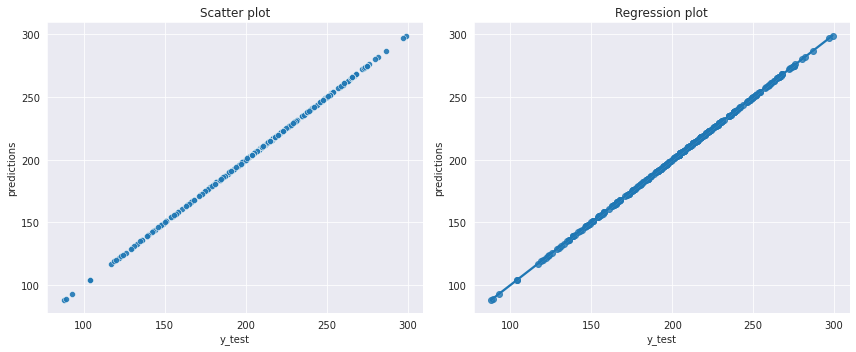

In [14]:
plt.figure(figsize=(12,5))
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=predictions, alpha=0.9);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Scatter plot')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Regression plot')

plt.tight_layout()
plt.show()

### <span style="font-family:Comic Sans MS; color:black">Well as above plot shows our model fits very well and showing that the reg score is almost equal to 1,<br>But still we can evaluate the model by the help of the cost functions</span>

### <span style="font-family:Comic Sans MS; color:blue">Evaluation</span> 

### <span style="font-family:Comic Sans MS; color:black">In case of linear regression we mostly use mean absolute error, mean squared error & root mean squared error as a cost fuctions <br>So lets import them and evaluate our model</span>

In [15]:
print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))
print('\n')
print('The Mean absolute error:', metrics.mean_absolute_error(y_test, predictions))
print('The mean squared error:', metrics.mean_squared_error(y_test, predictions))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

The regression score on training data : 1.0
The regression score on testing data : 1.0


The Mean absolute error: 3.884300288821881e-15
The mean squared error: 1.0635948631459827e-28
The root mean squared error: 1.0313073562939338e-14


### <span style="font-family:Comic Sans MS; color:black">Pretty well! That shows our model is best fitted on the given dataset</span>

### <span style="font-family:Comic Sans MS; color:black">**Lets create models to predict the math score, reading score and writing score and compare the result**</span> 



Predicting math score :
Plot between y_test and predictions 


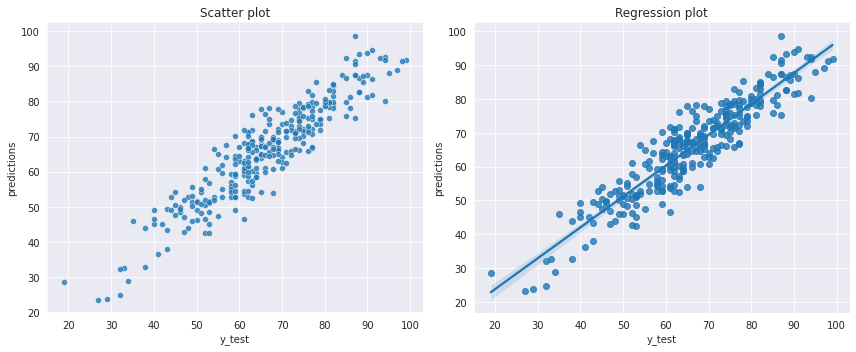

The regression score on training data : 0.8823567195578524
The regression score on testing data : 0.855858127166467


Predicting reading score :
Plot between y_test and predictions 


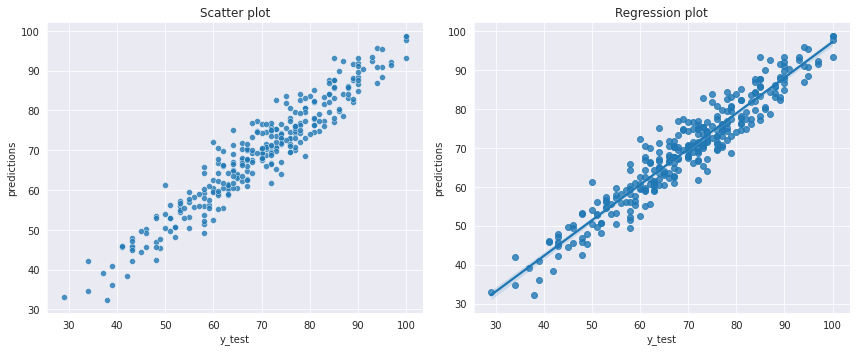

The regression score on training data : 0.9309156544545266
The regression score on testing data : 0.9144744493786325


Predicting writing score :
Plot between y_test and predictions 


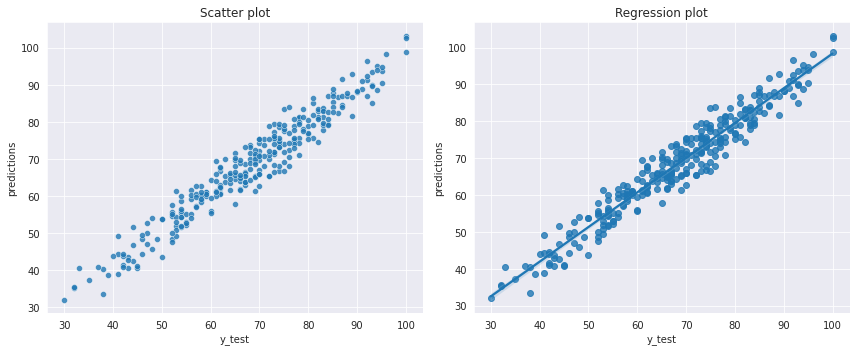

The regression score on training data : 0.949755138487475
The regression score on testing data : 0.9419406566375368


In [16]:
stud_perf2=stud_perf.drop('Total marks', axis=1)
sns.set_style("darkgrid")
for i in ['math score', 'reading score', 'writing score']:
    X_train, X_test, y_train, y_test = train_test_split(stud_perf2.drop([i], axis=1), stud_perf2[i], test_size=0.3, random_state=101)
    
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    
    print('\n')
    print(colored('Predicting {m} :'.format(m=i), 'blue', attrs=['bold']))
    print('Plot between y_test and predictions ')
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.8);
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Scatter plot')

    plt.subplot(1,2,2)
    sns.regplot(x=y_test, y=predictions)
    plt.xlabel('y_test')
    plt.ylabel('predictions')
    plt.title('Regression plot')

    plt.tight_layout()
    plt.show()
    print('The regression score on training data : {}'.format(LR.score(X_train, y_train)))
    print('The regression score on testing data : {}'.format(LR.score(X_test, y_test)))
   
    

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">2. LassoLarsCV</p>

<div class="alert alert-block alert-info">
<b>Note:</b> For total marks predictions only.</div>

In [17]:
X=stud_perf.drop(['Total marks'], axis=1)
y=stud_perf['Total marks']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
reg = LassoLarsCV(cv=5).fit(X_train,y_train)

pred2=reg.predict(X_test)

## <span style="font-family:Comic Sans MS; color:blue">Model Evaluation</span> 

Score For Train Data : 1.0
Score For Test Data : 1.0
The mean absolute error: 6.745419038149218e-14
The mean squared error: 7.630956562419533e-27
The root mean squared error: 8.735534650162824e-14




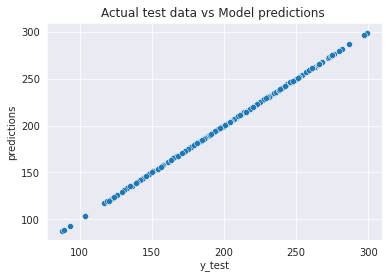

In [19]:
# Regression Score of the model
print('Score For Train Data : {}'.format(reg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(reg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">3. Decision Tree Regression Model</p>

### <span style="font-family:Comic Sans MS; color:black">Lets rerun train test split once again and use it for decision tree regression and random forest regression.</span>

In [20]:
X=stud_perf.drop(['Total marks'], axis=1)
y=stud_perf['Total marks']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# create a regressor object
DTR = DecisionTreeRegressor() 
# fit the model
DTR.fit(X_train,y_train)
# predict the values for test data
pred2 = DTR.predict(X_test)

## <span style="font-family:Comic Sans MS; color:blue">Model Evaluation</span> 

Score For Train Data : 1.0
Score For Test Data : 0.9886090646028449
The mean absolute error: 3.2866666666666666
The mean squared error: 18.913333333333334
The root mean squared error: 4.348946232518095




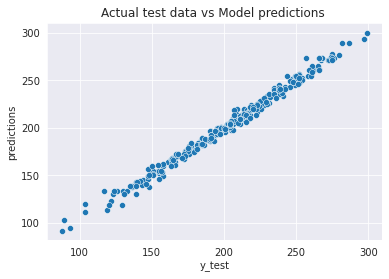

In [22]:
# Regression Score of the model
print('Score For Train Data : {}'.format(DTR.score(X_train,y_train)))
print('Score For Test Data : {}'.format(DTR.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred2))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred2))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred2);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">4. Random Forest Regression Model</p>

In [23]:
# create regressor object
RFreg = RandomForestRegressor(n_estimators = 100)

# fit the regressor with x and y data
RFreg.fit(X_train,y_train) 
# predict the values for test data
pred3 = RFreg.predict(X_test)

### <span style="font-family:Comic Sans MS; color:blue">Model Evaluation</span> 

Score For Train Data : 0.9994500245023901
Score For Test Data : 0.9973764340979882
The mean absolute error: 1.4794333333333338
The mean squared error: 4.356128333333337
The root mean squared error: 2.087133999850833




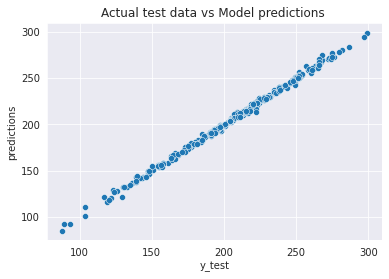

In [24]:
# Regression Score of the model
print('Score For Train Data : {}'.format(RFreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(RFreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred3);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">5. KNN Regression Model</p>

In [25]:
# create KKNeighborsRegressor object with initial value of n =2
KNneigh = KNeighborsRegressor(n_neighbors=2)

# fit the regressor with x and y data
KNneigh.fit(X_train,y_train)
# predict the values for test data
pred4 = KNneigh.predict(X_test)

### <span style="font-family:Comic Sans MS; color:blue">Model Evaluation</span> 

Score For Train Data : 0.9989837973422446
Score For Test Data : 0.9979121302761648
The mean absolute error: 1.4
The mean squared error: 3.466666666666667
The root mean squared error: 1.8618986725025255




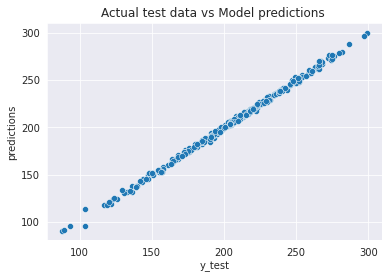

In [26]:
# Regression Score of the model
print('Score For Train Data : {}'.format(KNneigh.score(X_train,y_train)))
print('Score For Test Data : {}'.format(KNneigh.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred4))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred4))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred4)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred4);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">6. XGBoost Regression Model</p>

In [27]:
# create xgboost object with initial value of n estimators =10
xgb_reg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10)

# fit the regressor with x and y data
xgb_reg.fit(X_train,y_train)
# predict the values for test data
pred5 = xgb_reg.predict(X_test)

[13:27:48] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


### <span style="font-family:Comic Sans MS; color:blue">Model Evaluation</span> 

Score For Train Data : 0.9745935566044377
Score For Test Data : 0.9699977285964133
The mean absolute error: 6.017702433268229
The mean squared error: 49.81530840346008
The root mean squared error: 7.05799606145116




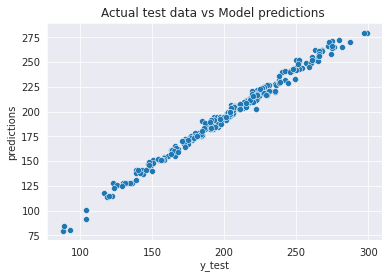

In [28]:
# Regression Score of the model
print('Score For Train Data : {}'.format(xgb_reg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(xgb_reg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred5))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred5))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred5)))
print('\n')

# Plot showacasing the how well model fitted on testing data
sns.scatterplot(x=y_test, y=pred5);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()

---

# <p style="background:navy;color:white;border :black solid; font-family:Comic Sans MS; font-size:170%;text-align:center;  border-radius: 20px 40px;">Model Performance Comparison</p>

### <span style="font-family:Comic Sans MS; color:black">Though we have comparison chart from Lazypredict yet we are going to compare the model's performances on the data that we did manually</span>

> **For predictions of total marks**

| Model     | Score For Test Data    | RMSE value
| ----------- | ----------- | --------------|
| LassoLarsCV    |    1.0000 | 0.0000 |
| Linear Regression    |    1.0000 | 0.0000 |
| KNN    | 0.9979 | 1.8618 |
| Random Forest Regression   | 0.9974 |  2.0589 |
| Decision Tree Regression    | 0.9886 | 4.3420 |
| XGBoost Regression   | 0.9699 | 7.0579 |

---

### <span style="font-family:Comic Sans MS; color:red">Thank you, waiting for your valuable feedback :)</span>